# Background on Hamiltonian Mechanics

This course will involve some knowledge of physics, specifically a branch of Classical Mechanics called "Hamiltonian Mechanics".  If you haven't seen this before, or if it has been a long time, then this workbook will be useful to summarize the concepts we will need.

For additional materials here, check out:  

- [Wikipedia: Hamiltonian Mechanics](https://en.wikipedia.org/wiki/Hamiltonian_mechanics)  


___
## The problem

Imagine we have a collection of objects, where their **positions** are denoted with ($\overrightarrow{x}$) and their **momenta** are denoted with ($\overrightarrow{v}$).  Each of these are vectors, where the number of elements is equal to the number of particles times the number of spatial dimensions.  Let's say we are working in 3-D space, with $N$ objects, so $\overrightarrow{x}$ and $\overrightarrow{v}$ will have size $3N$.  

We can denote the **mass** of the objects by $\overrightarrow{m}$, which is a vector of size $N$.

We also assume that each particle carries with it a **partial charge**. These are equal to zero for uncharged particles but in general can be positive or negative numbers.  Individual atoms can have fractional partial charge values, but the sum of all atoms in a molecule always sum up to integer values.  We denote the **partial charges** of the objects by $\overrightarrow{q}$, which is also a vector of size $N$.

*Note on notation:  This notebook is using (x,v) notation, but you might also come across resources using (q,p) to denote the positions and momenta, respectively. We will try and keep (x,v) notation consistent throughout these course materials.*

**The goal:** If we know the initial conditions of the $\overrightarrow{x}$ and $\overrightarrow{v}$ vectors at some initial time $t_0$, how do we calculate the values of $\overrightarrow{x}$ and $\overrightarrow{v}$ in the future?

___
## The Hamiltonian

Obviously to accomplish this goal we are going to need information about how what these particles are and how they interact with each other. This can be accomplished using a single function called the **Hamiltonian**:

\begin{equation}
\mathscr{H}(x,v) = U(x) + T(v)
\end{equation}

where $U(x)$ is the potential energy function (also called the "internal energy" function) that depends only on the particle positions and $T(v))$ is the kinetic energy function that depends only on the velocities.  Note that while we have dropped the arrow notation above, $x$ and $v$ are still vectors of size $3N$. While the particular form of $U(x)$ can be complicated, and is different from system-to-system, the kinetic energy function is simply defined as:

\begin{equation}
T(v) = \frac{1}{2}\sum_i m_i |v_i|^2
\end{equation}

where $\sum_i$ is a sum over all of the particles in the system.

The evolution of the system is then described completely by **Hamilton's equations**.
A simplified version of these is given below.

\begin{align}
\frac{dx}{dt} &= \frac{1}{m}\frac{d\mathscr{H}}{dv} = v \\
\frac{dv}{dt} &= -\frac{1}{m}\frac{d\mathscr{H}}{dx} = -\frac{1}{m}\frac{dU}{dx}
\end{align}

where the extra $1/m$ factors were necessary since we were dealing with the velocity instead of the momentum.

The top equation above is intuitive: **the rate of change of the positions is given by the velocity.**  The second equation is less intuitive and requires some more explanation.

___
## Net forces

Another way to describe the second equation above, for a given particle, is as follows:

\begin{equation}
\overrightarrow{F}_{\text{net}} = m\overrightarrow{a} = m\frac{d\overrightarrow{v}}{dt} = -\frac{dU}{d\overrightarrow{x}}
\end{equation}

where we have brought back the arrows to remind us which variables are vectors.  Since this equation is for a single particle, all vectors have three components corresponding to the three spatial dimensions.  The net force on each atom, by Newton's second law, is equal to its acceleration times its mass.  The acceleration is equal to the time derivative of the velocity, which as we have seen is equal to the negative derivative of the internal energy function $U$ with respect to the positions, $\overrightarrow{x}$.

To gain some intuition about the last equality, consider the potential energy surface $U(x) = kx^2$:
<img src="https://github.com/ADicksonLab/ml4md-jb/blob/main/figures/Ham_schem1-01.png?raw=true" width="500"/>

If we think about a marble rolling in a smooth bowl, it is intuitive that a particle resting at positive $x$ will experience a force in the left-ward direction.  Connecting this to our equation above, we see this is indeed the case.  The derivative of $U$ with respect to $x$ is positive for $x > 0$, so the net force on that particle will be in the negative direction.  Since the derivative is equal to $2kx$, we see that the higher we go, the larger this net force will be. 

<img src="https://github.com/ADicksonLab/ml4md-jb/blob/main/figures/Ham_schem2-01.png?raw=true" width="500"/>

The same particle sometime later will have travelled leftward and gained some velocity in the negative direction.  As the $dU/dx$ is still positive, it continues to accelerate in the negative direction.

<img src="https://github.com/ADicksonLab/ml4md-jb/blob/main/figures/Ham_schem3-01.png?raw=true" width="500"/>

As our particle reaches $x=0$ is has accumulated its maximum velocity in the leftward direction.  Here $dU/dx = 0$, so it is experiencing no net force, however it continues to move rapidly.

<img src="https://github.com/ADicksonLab/ml4md-jb/blob/main/figures/Ham_schem4-01.png?raw=true" width="500"/>

As $x$ goes negative our particle begins to decelerate. Here $dU/dx$ is negative, so our net force is in the positive direction and our particle is gradually losing its negative velocity.

<img src="https://github.com/ADicksonLab/ml4md-jb/blob/main/figures/Ham_schem5-01.png?raw=true" width="500"/>

Eventually our particle loses momentum, the velocity reaches zero, and the particle is once again stationary with a maximum value of potential energy. 

___
## Solving Hamilton's equations

Now that we have equations for $dx/dt$ and $dv/dt$, how do we solve them for $x(t)$ and $v(t)$?  **In other words, how do we actually generate our trajectories?**

This type of problem is called an **initial value problem** or IVP.  For simple systems (like the single particle above), one can find exact solutions.  However, for systems we are interested in these IVPs can be solved numerically.

A simple illustrative approach is to use Euler's method.  Starting with the definition of $\frac{dx}{dt} \approx \frac{x(t+\delta t) - x(t)}{\delta t}$, we can rearrange to get:
\begin{equation}
x(t + \delta t) \approx x(t) + v\delta t
\end{equation}
where the approximation becomes exact as $\delta t \rightarrow 0$.

Similarly we can get:
\begin{equation}
v(t + \delta t) \approx v(t) - \frac{1}{m}\frac{dU}{dx(t)} \delta t
\end{equation}

As a simple demonstration, let's code up the example above, first defining a function that returns the derivatives of x and v:

First let's define our parameters and initial conditions:

In [6]:
import numpy as np
import matplotlib.pyplot as plt

x = 1
v = 0
k = 1
m = 1
dt = 0.01

In [7]:
def force(x):
    """Compute the force for a simple 1D, one particle system."""
    return -2*k*x

Then let's make a trajectory that is 1000 steps long:

In [9]:
traj_x = np.zeros(1000)
traj_v = np.zeros(1000)

for step in range(1000):
    # get force
    f = force(x)
    
    # use them in update equations
    x = x + v*dt
    v = v + f*dt/m
    
    # append values to trajectories
    traj_x[step] = x
    traj_v[step] = v

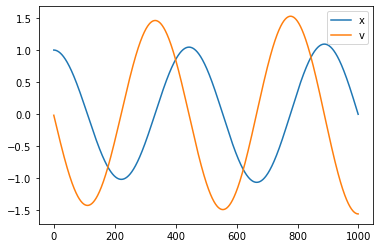

In [10]:
plt.plot(traj_x,label='x')
plt.plot(traj_v,label='v')
plt.legend()

**Stop and think about the quantities in this graph.  Do they match with the intuitive example above?**

___
## A note on integration error

The approximation signs above are only valid in the limit of a sufficiently small time step.  **But how small does the time step need to be?**  The answer to this question depends on how fast the internal energy of a given particle can change.  In molecular dynamics applications, stable numerical integration, in general, is **achieved with a timestep of $\delta t = 1.0$ fs**, where one femtosecond is $10^{-15}$ seconds.  A common trick is to restrain the vibration of covalent bonds involving hydrogen atoms, since this is typically the fastest motion in a molecular system.  **Systems with these restraints can be run with $\delta t = 2.0$ fs.**  While this might not seem like a significant difference, this cuts the computational cost of a given simulation **in half!**.

To study integration error on our model system, go through the exercises below:

### 1) Run trajectories with $dt = 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05$ and $0.10$, adjusting the number of steps accordingly so the time duration is the same.  Save the positions for future analysis.

In [11]:
# your code here

### 2) Plot each trajectory's position vs time and plot the maximum $x$ value reached in each simulation as a function of timestep.

In [13]:
# your code here

### 3) Using your intuition as a guide, at which timestep does the Euler's method approximation break down?

/ your answer here /

___
## A better integration function

Euler's method is a "first order" method: the global error (error at a given time) is proportional to the step size.  **A commonly used integration function is called the "Velocity Verlet" algorithm**, which is accurate to second order, is simple to implement, and has some beneficial stability properties compared to other integrators.

The velocity verlet equations are as follows:

$$x(t + \delta t) = x(t) + v(t)\delta t + \frac{1}{2m}f(t)\delta t^2$$
$$v(t + \delta t) = v(t) + \frac{1}{2m}\left[f(t) + f(t + \delta t)\right]\delta t$$

Let's write a simple function to implement the Velocity Verlet algorithm:

In [24]:
def velocity_verlet(x, v, force_alg, dt, m):
    """
    x : positions 
    np.array, shape = (N,ndim)
    
    v : velocities 
    np.array, shape = (N,ndim)
    
    force_alg : force function
    callable function that takes in x, returns a np.array with same shape
    
    dt : time step
    float
    
    m : masses
    np.array, shape = (N)
    """
    
    # define arrays for new positions and new velocities
    new_x = np.zeros_like(x)
    new_v = np.zeros_like(x)
    
    N = x.shape[0]
    
    # compute f(t)
    f = force_alg(x)
    
    # use f to update x
    for i in range(N):
        new_x[i] = x[i] + v[i]*dt + f[i]*dt**2/(2*m[i])
    
    # compute f(t+dt)
    new_f = force_alg(new_x)
    
    # use f(t+dt) and f(t) to update v
    for i in range(N):
        new_v[i] = v[i] + (f[i] + new_f[i])*dt/(2*m[i])
        
    return new_x, new_v

Where the `force_alg` from our one particle example is the `force` function defined above.

### 4) Modify your code from 1) to use this integration function instead.  Make a plot of the maximum position reached as a function of timestep size and compare to your results from 2)

In [25]:
# your code here